# Sources for Scaling Factors for Future Grid

Sonia Martin and Siobhan Powell

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Baseline
wecc_generators = pd.read_csv('../Data/wecc_gen_2022.csv')
wecc_generators['Initial Operating Month-Year'] = pd.to_datetime(wecc_generators['Initial Operating Month-Year'])
wecc_generators['Confirmed Retirement  Month-Year'] = pd.to_datetime(wecc_generators['Confirmed Retirement  Month-Year'])

/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_13840/2226779986.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wecc_generators['Initial Operating Month-Year'] = pd.to_datetime(wecc_generators['Initial Operating Month-Year'])
/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_13840/2226779986.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wecc_generators['Confirmed Retirement  Month-Year'] = pd.to_datetime(wecc_generators['Confirmed Retirement  Month-Year'])


In [3]:
wecc_generators['year'] = wecc_generators['Initial Operating Month-Year'].dt.year

In [61]:
wecc_generators.loc[(wecc_generators['year']>=2019)&(wecc_generators['Energy Source - 1'].isin([' WND ', ' SUN ', ' MWH ', ' GEO ']))].groupby(['Energy Source - 1', 'year'])['Nameplate Capacity'].agg('sum')

Energy Source - 1  year
 GEO               2019      219.6
                   2020       15.0
                   2022       29.0
                   2023      439.5
                   2026       44.0
                   2031      801.0
 MWH               2019       10.0
                   2020      474.7
                   2021     2285.5
                   2022     2505.4
                   2023     2732.5
                   2024     1244.0
                   2025      842.2
                   2026      605.0
                   2027        5.0
                   2028      516.5
                   2029      549.0
                   2030      841.0
                   2031    10238.1
                   2032      381.0
                   2033     1100.0
 SUN               2019     2302.3
                   2020     3115.8
                   2021     4039.8
                   2022     6837.4
                   2023     8375.0
                   2024     2744.5
                   2025     188

geothermal: 

In [152]:
wecc_generators.loc[(wecc_generators['Country']=='US')&(wecc_generators['year']<=2022)&(wecc_generators['Energy Source - 1']==' GEO ')]['Nameplate Capacity'].sum()

4018.0999999999995

# Solar

## Grid-Scale WECC official - only includes particular planned projects

In [106]:
# wecc_generators.loc[solar_idxs[0], 'Confirmed Retirement  Month-Year']

In [4]:
solar = wecc_generators.loc[4000, 'Generation Type']
solar_idxs = np.where(wecc_generators.loc[:, 'Generation Type']==solar)[0]

year_list = np.arange(2019, 2039)
solar_capacities = pd.DataFrame({'Year':year_list, 'Gridscale Capacity':np.zeros((len(year_list),))})

for idx in solar_idxs:
    for i, year in enumerate(year_list):
        in_op = wecc_generators.loc[idx, 'Initial Operating Month-Year'].year < year
        no_retire = np.isnan(wecc_generators.loc[idx, 'Confirmed Retirement  Month-Year'].year)
        later_retire = wecc_generators.loc[idx,'Confirmed Retirement  Month-Year'].year > year
        if in_op and (no_retire or later_retire):
            solar_capacities.loc[i, 'Gridscale Capacity'] += wecc_generators.loc[idx, 'Nameplate Capacity']            

inds_known = solar_capacities[solar_capacities['Year']<=2033].index
m, b = np.polyfit(solar_capacities.loc[inds_known, 'Year'].values, solar_capacities.loc[inds_known, 'Gridscale Capacity'].values, 1)
for i in solar_capacities.index:
    solar_capacities.loc[i, 'Gridscale Linear Fit'] = m*solar_capacities.loc[i, 'Year'] + b

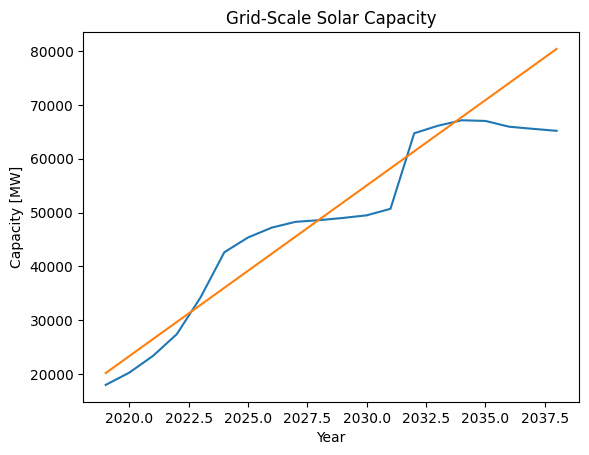

In [111]:

plt.figure()
plt.plot(year_list, solar_capacities['Gridscale Capacity'], color = 'tab:blue')
plt.plot(year_list, solar_capacities['Gridscale Linear Fit'], color = 'tab:orange')
plt.xlabel('Year')
plt.ylabel('Capacity [MW]')
plt.title('Grid-Scale Solar Capacity')
plt.show()

## Rooftop
https://www.wecc.org/epubs/StateOfTheInterconnection/Pages/Rooftop-Solar-by-State.aspx
https://files.pitchbook.com/website/files/pdf/Rooftop_Solar_Outlook.pdf

In [5]:
# 2022 

solar_capacities.loc[solar_capacities[solar_capacities['Year']==2019].index, 'Rooftop Capacity'] = 2715.66 + 1194.66 + 7463.01
solar_capacities.loc[solar_capacities[solar_capacities['Year']==2020].index, 'Rooftop Capacity'] = 3044.19 + 1356.90 + 8837.66 # mw
solar_capacities.loc[solar_capacities[solar_capacities['Year']==2021].index, 'Rooftop Capacity'] = 3343.71 + 1529.52 + 10551.17 # mw
solar_capacities.loc[solar_capacities[solar_capacities['Year']==2022].index, 'Rooftop Capacity'] = 3775.74 + 1624.94 + 12861.79 # mw


In [30]:
rooftop_solar_2022 = 3775.74 + 1624.94 + 12861.79 # mw
rooftop_solar_2021 = 3343.71 + 1529.52 + 10551.17 # mw
rooftop_solar_2020 = 3044.19 + 1356.90 + 8837.66 # mw
rooftop_solar_2019 = 2715.66 + 1194.66 + 7463.01 # mw
print(rooftop_solar_2019)
print(rooftop_solar_2022)

11373.33
18262.47


In [6]:
m, b = np.polyfit([0, 1, 2, 3], (solar_capacities.loc[0:3, 'Rooftop Capacity'] / solar_capacities.loc[0, 'Rooftop Capacity']).values, 1)
m*19 + b

4.797856916136256

In [7]:
m, b = np.polyfit(solar_capacities.loc[0:3, 'Year'].values, solar_capacities.loc[0:3, 'Rooftop Capacity'].values, 1)
for i in solar_capacities.index:
    if i <= 3:
        solar_capacities.loc[i, 'Rooftop Projected'] = solar_capacities.loc[i, 'Rooftop Capacity']
    if i > 3:
        solar_capacities.loc[i, 'Rooftop Projected'] = m*solar_capacities.loc[i, 'Year'] + b

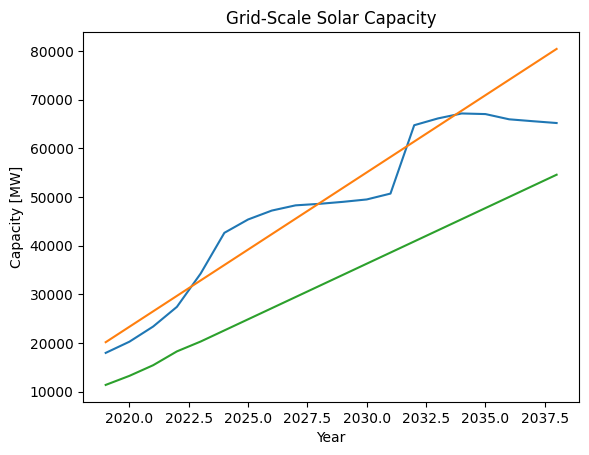

In [115]:
plt.figure()
plt.plot(year_list, solar_capacities['Gridscale Capacity'], color = 'tab:blue')
plt.plot(year_list, solar_capacities['Gridscale Linear Fit'], color = 'tab:orange')
plt.plot(year_list, solar_capacities['Rooftop Projected'], color = 'C2')
plt.xlabel('Year')
plt.ylabel('Capacity [MW]')
plt.title('Grid-Scale Solar Capacity')
plt.show()

In [8]:
solar_capacities['Total'] = solar_capacities['Rooftop Projected'] + solar_capacities['Gridscale Linear Fit']

In [9]:
solar_capacities['Solar Over 2019'] = solar_capacities['Total'] / solar_capacities.loc[0, 'Total']
solar_capacities['Solar Over 2022'] = solar_capacities['Total'] / solar_capacities.loc[3, 'Total']
solar_capacities

,Year,Gridscale Capacity,Gridscale Linear Fit,Rooftop Capacity,Rooftop Projected,Total,Solar Over 2019,Solar Over 2022
0,2019,17955.1,20154.395833,11373.33,11373.330,31527.725833,1.000000,0.657758
1,2020,20257.4,23326.141190,13238.75,13238.750,36564.891190,1.159769,0.762848
2,2021,23373.2,26497.886548,15424.40,15424.400,41922.286548,1.329696,0.874618
3,2022,27413.0,29669.631905,18262.47,18262.470,47932.101905,1.520316,1.000000
4,2023,34250.4,32841.377262,NaN,20288.005,53129.382262,1.685164,1.108430
5,2024,42625.4,36013.122619,NaN,22573.312,58586.434619,1.858251,1.222280
6,2025,45369.9,39184.867976,NaN,24858.619,64043.486976,2.031339,1.336129
7,2026,47201.4,42356.613333,NaN,27143.926,69500.539333,2.204426,1.449979
8,2027,48273.4,45528.358690,NaN,29429.233,74957.591690,2.377513,1.563829
9,2028,48582.4,48700.104048,NaN,31714.540,80414.644048,2.550601,1.677678


Result:
    2038 is 2.8 over 2022 or 4.3 over 2019

# Wind

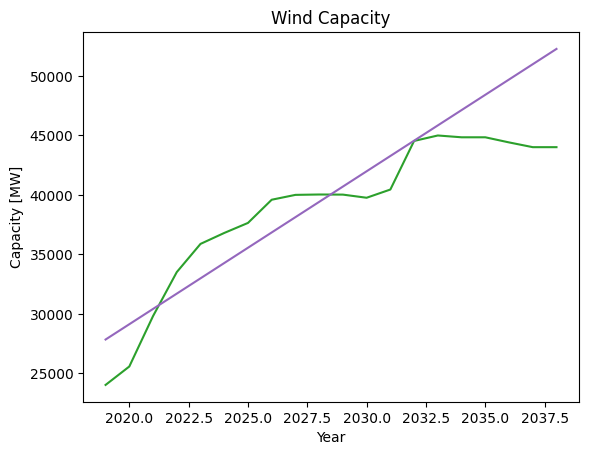

In [10]:
wind = wecc_generators.loc[225, 'Generation Type']
wind_idxs = np.where(wecc_generators.loc[:, 'Generation Type']==wind)[0]

# year_list = [2022, 2027, 2032, 2037]
wind_capacities = pd.DataFrame({'Year':year_list, 'Planned Capacity':np.zeros((len(year_list),))})#[{str(year):[] for year in year_list}]

for idx in wind_idxs:
    for i, year in enumerate(year_list):
        in_op = wecc_generators.loc[idx, 'Initial Operating Month-Year'].year < year
        no_retire = np.isnan(wecc_generators.loc[idx,'Confirmed Retirement  Month-Year'].year)
        later_retire = wecc_generators.loc[idx,'Confirmed Retirement  Month-Year'].year > year
        if in_op and (no_retire or later_retire):
            wind_capacities.loc[i, 'Planned Capacity'] += wecc_generators.loc[idx, 'Nameplate Capacity']

inds_known = wind_capacities[wind_capacities['Year']<=2033].index
m, b = np.polyfit(wind_capacities.loc[inds_known, 'Year'].values, wind_capacities.loc[inds_known, 'Planned Capacity'].values, 1)
for i in wind_capacities.index:
    wind_capacities.loc[i, 'Linear Fit'] = m*wind_capacities.loc[i, 'Year'] + b
            
            
plt.figure()
plt.plot(wind_capacities['Year'], wind_capacities['Planned Capacity'], color='tab:green')
plt.plot(wind_capacities['Year'], wind_capacities['Linear Fit'], color='tab:purple')
plt.xlabel('Year')
plt.ylabel('Capacity [MW]')
plt.title('Wind Capacity')
plt.show()
# print(wind_sums)

In [121]:
wind_capacities['Wind Over 2019'] = wind_capacities['Linear Fit'] / wind_capacities.loc[0, 'Linear Fit']
wind_capacities['Wind Over 2022'] = wind_capacities['Linear Fit'] / wind_capacities.loc[3, 'Linear Fit']
wind_capacities

,Year,Planned Capacity,Linear Fit,Wind Over 2019,Wind Over 2022
0,2019,24020.4,27838.835000,1.000000,0.878265
1,2020,25569.6,29125.064286,1.046203,0.918844
2,2021,29809.5,30411.293571,1.092405,0.959422
3,2022,33507.9,31697.522857,1.138608,1.000000
4,2023,35879.7,32983.752143,1.184811,1.040578
5,2024,36799.9,34269.981429,1.231013,1.081156
6,2025,37643.3,35556.210714,1.277216,1.121735
7,2026,39594.6,36842.440000,1.323419,1.162313
8,2027,40003.1,38128.669286,1.369622,1.202891
9,2028,40034.2,39414.898571,1.415824,1.243469


Result: 2038 is 1.9 over 2019 or 1.7 over 2022

# Hydro

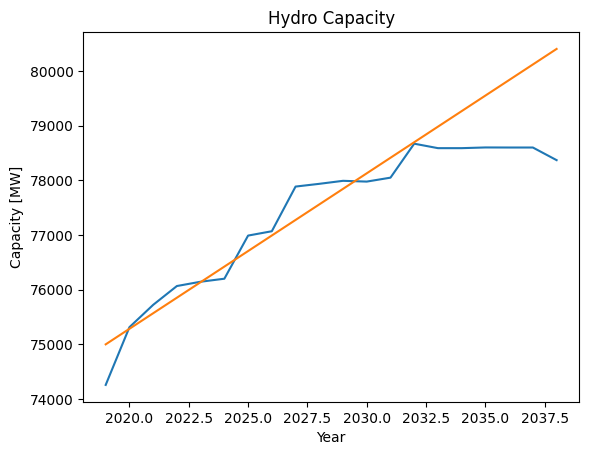

,Year,Planned Capacity,Linear Fit,Hydro Over 2019,Hydro Over 2022
0,2019,74260.52,75002.199167,1.000000,0.988760
1,2020,75315.72,75286.403095,1.003789,0.992507
2,2021,75724.02,75570.607024,1.007579,0.996253
3,2022,76068.22,75854.810952,1.011368,1.000000
4,2023,76146.72,76139.014881,1.015157,1.003747
5,2024,76201.82,76423.218810,1.018946,1.007493
6,2025,76990.22,76707.422738,1.022736,1.011240
7,2026,77069.62,76991.626667,1.026525,1.014987
8,2027,77886.02,77275.830595,1.030314,1.018733
9,2028,77936.22,77560.034524,1.034103,1.022480


In [13]:
hydro = wecc_generators.loc[500, 'Generation Type']
hydro_idxs = np.where(wecc_generators.loc[:, 'Generation Type']==hydro)[0]

# year_list = [2022, 2027, 2032, 2037]
hydro_capacities = pd.DataFrame({'Year':year_list, 'Planned Capacity':np.zeros((len(year_list),))})

for idx in hydro_idxs:
    for i, year in enumerate(year_list):
        in_op = wecc_generators.loc[idx, 'Initial Operating Month-Year'].year < year
        no_retire = np.isnan(wecc_generators.loc[idx,'Confirmed Retirement  Month-Year'].year)
        later_retire = wecc_generators.loc[idx,'Confirmed Retirement  Month-Year'].year > year
        if in_op and (no_retire or later_retire):
            hydro_capacities.loc[i, 'Planned Capacity'] += wecc_generators.loc[idx, 'Nameplate Capacity']

            
inds_known = hydro_capacities[hydro_capacities['Year']<=2033].index
m, b = np.polyfit(hydro_capacities.loc[inds_known, 'Year'].values, hydro_capacities.loc[inds_known, 'Planned Capacity'].values, 1)
for i in hydro_capacities.index:
    hydro_capacities.loc[i, 'Linear Fit'] = m*hydro_capacities.loc[i, 'Year'] + b

            
plt.figure()
plt.plot(year_list, hydro_capacities['Planned Capacity'])
plt.plot(year_list, hydro_capacities['Linear Fit'])
plt.xlabel('Year')
plt.ylabel('Capacity [MW]')
plt.title('Hydro Capacity')
plt.show()


hydro_capacities['Hydro Over 2019'] = hydro_capacities['Linear Fit'] / hydro_capacities.loc[0, 'Linear Fit']
hydro_capacities['Hydro Over 2022'] = hydro_capacities['Linear Fit'] / hydro_capacities.loc[3, 'Linear Fit']
hydro_capacities


Result: 7% increase over 2019 and 6% increase over 2022.

# Demand
Use electrification futures project because separates non-ev and ev increase

In [123]:
# Code from https://github.com/SiobhanPowell/speech-grid-impact/blob/main/GridModel_GridImpact/PreProcessing/3_ElectrificationIncrease.ipynb

wecc_regions = pd.read_csv('../Data/GridInputData/wecc_counties_population.csv', index_col=0)
df = pd.read_csv('/Users/spowell/Documents/EFSLoadProfile_Reference_Moderate.csv')
efs_loads = pd.DataFrame({'Hour':np.arange(1, 8761)})
for state in ['AZ', 'CA', 'CO', 'ID', 'MT', 'NE', 'NM', 'ND', 'NV', 'OK', 'OR', 'SD', 'TX', 'UT', 'WA', 'WY']:
    for year in [2020, 2030, 2040]:
        local_load = df.loc[(df['Year']==year)&(df['State']==state)&(~(df['Subsector']=='light-duty vehicles'))].groupby(by='LocalHourID').sum()['LoadMW']
        efs_loads[state+'_'+str(year)+'_nonLDV'] = local_load.values
        local_load = df.loc[(df['Year']==year)&(df['State']==state)&((df['Subsector']=='light-duty vehicles'))].groupby(by='LocalHourID').sum()['LoadMW']
        efs_loads[state+'_'+str(year)+'_LDV'] = local_load.values
regions1 = pd.read_csv('../Data/GridInputData/county_eiaregion_population_mapping.csv', index_col=0)

states = np.sort(list(set(wecc_regions['State_name'])))
state_shortforms = {'Arizona':'AZ', 'California':'CA', 'Colorado':'CO', 'Idaho':'ID', 'Montana':'MT', 
                    'Nebraska':'NE', 'Nevada':'NV', 'New Mexico':'NM', 'North Dakota':'ND', 'Oklahoma':'OK', 
                    'Oregon':'OR', 'South Dakota':'SD', 'Texas':'TX', 'Utah':'UT', 'Washington':'WA', 'Wyoming':'WY'}
for year in [2020, 2030, 2040]:
    efs_loads['WECC_'+str(year)+'_LDV'] = 0
    efs_loads['WECC_'+str(year)+'_nonLDV'] = 0
    for state in states:
        frac = wecc_regions.loc[(wecc_regions['State_name']==state)]['Population'].sum() / regions1.loc[regions1['State_name']==state]['Population'].sum()
        efs_loads['WECC_'+str(year)+'_LDV'] += frac*efs_loads[state_shortforms[state]+'_'+str(year)+'_LDV'].values
        efs_loads['WECC_'+str(year)+'_nonLDV'] += frac*efs_loads[state_shortforms[state]+'_'+str(year)+'_nonLDV'].values


/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_11969/3713986397.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  efs_loads['WECC_'+str(year)+'_nonLDV'] = 0
/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_11969/3713986397.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  efs_loads['WECC_'+str(year)+'_LDV'] = 0
/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_11969/3713986397.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

In [124]:
for year_int in np.arange(1, 10):
    efs_loads['WECC_202'+str(year_int)+'_nonLDV'] = efs_loads['WECC_2020_nonLDV'] + (year_int/10)*(efs_loads['WECC_2030_nonLDV'] - efs_loads['WECC_2020_nonLDV'])
    efs_loads['WECC_203'+str(year_int)+'_nonLDV'] = efs_loads['WECC_2030_nonLDV'] + (year_int/10)*(efs_loads['WECC_2040_nonLDV'] - efs_loads['WECC_2030_nonLDV'])
# efs_loads['WECC_2022_nonLDV'] = efs_loads['WECC_2020_nonLDV'] + (2/10)*(efs_loads['WECC_2030_nonLDV'] - efs_loads['WECC_2020_nonLDV'])
# efs_loads['WECC_2037_nonLDV'] = efs_loads['WECC_2030_nonLDV'] + (7/10)*(efs_loads['WECC_2040_nonLDV'] - efs_loads['WECC_2030_nonLDV'])


/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_11969/1753820963.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  efs_loads['WECC_202'+str(year_int)+'_nonLDV'] = efs_loads['WECC_2020_nonLDV'] + (year_int/10)*(efs_loads['WECC_2030_nonLDV'] - efs_loads['WECC_2020_nonLDV'])
/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_11969/1753820963.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  efs_loads['WECC_203'+str(year_int)+'_nonLDV'] = efs_loads['WECC_2030_nonLDV'] + (year_int/10)*(efs_loads['WECC_2040_nonL

In [125]:
print((efs_loads['WECC_2037_nonLDV'] / efs_loads['WECC_2022_nonLDV']).mean())

1.12516730112879


In [126]:
efs_fractions = pd.DataFrame({'Year':year_list, 'EFS':np.zeros((len(year_list),))})
for i, year in enumerate(year_list):
    if year == 2019:
        efs_fractions.loc[i, 'EFS'] = efs_loads['WECC_'+str(2020)+'_nonLDV'].sum()
    else:
        efs_fractions.loc[i, 'EFS'] = efs_loads['WECC_'+str(year)+'_nonLDV'].sum()
        
efs_fractions['Demand Over 2019'] = efs_fractions['EFS'] / efs_fractions.loc[0, 'EFS']
efs_fractions['Demand Over 2022'] = efs_fractions['EFS'] / efs_fractions.loc[3, 'EFS']
efs_fractions

,Year,EFS,Demand Over 2019,Demand Over 2022
0,2019,7.290827e+08,1.000000,0.987262
1,2020,7.290827e+08,1.000000,0.987262
2,2021,7.337862e+08,1.006451,0.993631
3,2022,7.384897e+08,1.012902,1.000000
4,2023,7.431932e+08,1.019354,1.006369
5,2024,7.478967e+08,1.025805,1.012738
6,2025,7.526002e+08,1.032256,1.019107
7,2026,7.573036e+08,1.038707,1.025476
8,2027,7.620071e+08,1.045159,1.031845
9,2028,7.667106e+08,1.051610,1.038214


Result: 2038 is 14.9% over 2019 or 13.5% over 2022, non ev demand

# Batteries

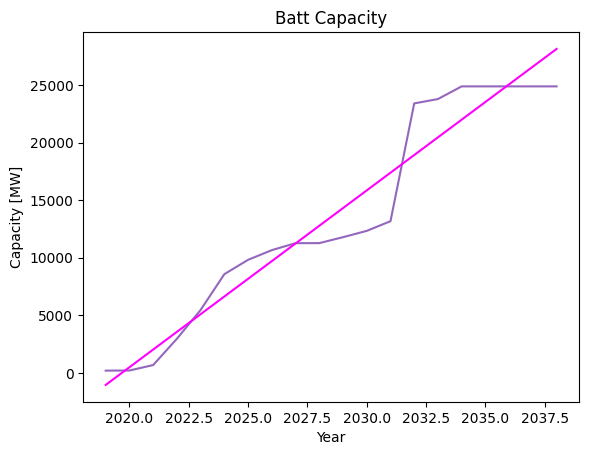

,Year,Planned Capacity,Linear Fit,Batteries Over 2019,Batteries Over 2022
0,2019,190.7,-1051.883333,-2.166925,-0.295469
1,2020,200.7,485.426667,1.000000,0.136354
2,2021,675.4,2022.736667,4.166925,0.568177
3,2022,2960.9,3560.046667,7.333851,1.000000
4,2023,5466.3,5097.356667,10.500776,1.431823
5,2024,8578.8,6634.666667,13.667701,1.863646
6,2025,9822.8,8171.976667,16.834627,2.295469
7,2026,10665.0,9709.286667,20.001552,2.727292
8,2027,11270.0,11246.596667,23.168477,3.159115
9,2028,11275.0,12783.906667,26.335403,3.590938


In [11]:
batt = wecc_generators.loc[848, 'Generation Type']
batt_idxs = np.where(wecc_generators.loc[:, 'Generation Type']==batt)[0]

# year_list = [2020, 2025, 2030, 2035]
batt_capacities = pd.DataFrame({'Year':year_list, 'Planned Capacity':np.zeros((len(year_list),))})#[{str(year): [] for year in year_list}]

for idx in batt_idxs:
    for i, year in enumerate(year_list):
        in_op = wecc_generators.loc[idx, 'Initial Operating Month-Year'].year < year
        no_retire = np.isnan(wecc_generators.loc[idx,'Confirmed Retirement  Month-Year'].year)
        later_retire = wecc_generators.loc[idx,'Confirmed Retirement  Month-Year'].year > year
        if in_op and (no_retire or later_retire):
            batt_capacities.loc[i, 'Planned Capacity'] += wecc_generators.loc[idx, 'Nameplate Capacity']

inds_known = batt_capacities[batt_capacities['Year']<=2033].index
m, b = np.polyfit(batt_capacities.loc[inds_known, 'Year'].values, batt_capacities.loc[inds_known, 'Planned Capacity'].values, 1)
for i in batt_capacities.index:
    batt_capacities.loc[i, 'Linear Fit'] = m*batt_capacities.loc[i, 'Year'] + b
            

plt.figure()
plt.plot(year_list, batt_capacities['Planned Capacity'], color = 'tab:purple')
plt.plot(year_list, batt_capacities['Linear Fit'], color = 'magenta')
plt.xlabel('Year')
plt.ylabel('Capacity [MW]')
plt.title('Batt Capacity')
plt.show()


batt_capacities['Batteries Over 2019'] = batt_capacities['Linear Fit'] / batt_capacities.loc[1, 'Linear Fit']
batt_capacities['Batteries Over 2022'] = batt_capacities['Linear Fit'] / batt_capacities.loc[3, 'Linear Fit']
batt_capacities


In [28]:
batt_capacities['Absolute Capacity'] = np.maximum(batt_capacities['Planned Capacity'], batt_capacities['Linear Fit'])
batt_capacities

,Year,Planned Capacity,Linear Fit,Batteries Over 2019,Batteries Over 2022,Absolute Capacity
0,2019,190.7,-1051.883333,-2.166925,-0.295469,190.700000
1,2020,200.7,485.426667,1.000000,0.136354,485.426667
2,2021,675.4,2022.736667,4.166925,0.568177,2022.736667
3,2022,2960.9,3560.046667,7.333851,1.000000,3560.046667
4,2023,5466.3,5097.356667,10.500776,1.431823,5466.300000
5,2024,8578.8,6634.666667,13.667701,1.863646,8578.800000
6,2025,9822.8,8171.976667,16.834627,2.295469,9822.800000
7,2026,10665.0,9709.286667,20.001552,2.727292,10665.000000
8,2027,11270.0,11246.596667,23.168477,3.159115,11270.000000
9,2028,11275.0,12783.906667,26.335403,3.590938,12783.906667


Result:  5 GW 2023, 13 GW 2028, 20 GW 2033, 28 GW 2038

In [154]:
combined_scaling = pd.concat((solar_capacities.loc[:, ['Year', 'Solar Over 2019', 'Solar Over 2022']],
           wind_capacities.loc[:, ['Wind Over 2019', 'Wind Over 2022']],
           hydro_capacities.loc[:, ['Hydro Over 2019', 'Hydro Over 2022']],
           batt_capacities.loc[:, ['Batteries Over 2019', 'Batteries Over 2022']],
           efs_fractions.loc[:, ['Demand Over 2019', 'Demand Over 2022']],
           batt_capacities['Absolute Capacity']), axis=1).rename(columns={'Absolute Capacity':'Battery MW'})

In [155]:
combined_scaling

,Year,Solar Over 2019,Solar Over 2022,Wind Over 2019,Wind Over 2022,Hydro Over 2019,Hydro Over 2022,Batteries Over 2019,Batteries Over 2022,Demand Over 2019,Demand Over 2022,Battery MW
0,2019,1.000000,0.657758,1.000000,0.878265,1.000000,0.988760,-2.166925,-0.295469,1.000000,0.987262,190.700000
1,2020,1.159769,0.762848,1.046203,0.918844,1.003789,0.992507,1.000000,0.136354,1.000000,0.987262,485.426667
2,2021,1.329696,0.874618,1.092405,0.959422,1.007579,0.996253,4.166925,0.568177,1.006451,0.993631,2022.736667
3,2022,1.520316,1.000000,1.138608,1.000000,1.011368,1.000000,7.333851,1.000000,1.012902,1.000000,3560.046667
4,2023,1.685164,1.108430,1.184811,1.040578,1.015157,1.003747,10.500776,1.431823,1.019354,1.006369,5466.300000
5,2024,1.858251,1.222280,1.231013,1.081156,1.018946,1.007493,13.667701,1.863646,1.025805,1.012738,8578.800000
6,2025,2.031339,1.336129,1.277216,1.121735,1.022736,1.011240,16.834627,2.295469,1.032256,1.019107,9822.800000
7,2026,2.204426,1.449979,1.323419,1.162313,1.026525,1.014987,20.001552,2.727292,1.038707,1.025476,10665.000000
8,2027,2.377513,1.563829,1.369622,1.202891,1.030314,1.018733,23.168477,3.159115,1.045159,1.031845,11270.000000
9,2028,2.550601,1.677678,1.415824,1.243469,1.034103,1.022480,26.335403,3.590938,1.051610,1.038214,12783.906667


In [156]:
combined_scaling.to_csv('../Data/scaling_generation_fractions_2024final.csv')